# Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
Books = pd.read_csv('goodreads_library_export.csv')
Books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,18619684,The Time Traveler's Wife,Audrey Niffenegger,"Niffenegger, Audrey",NaN,"=""""","=""9781939126016""",0,3.98,Zola Books,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,59948868,האוצר,שלום עליכם,"עליכם, שלום",יצחק דב ברקוביץ',"=""""","=""""",5,5.00,NaN,...,NaN,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,52381770,"Network Effect (The Murderbot Diaries, #5)",Martha Wells,"Wells, Martha",NaN,"=""1250229863""","=""9781250229861""",0,4.45,Tor.com,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,357,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,"Adams, Douglas",Wilson McLean,"=""0671742515""","=""9780671742515""",4,4.02,Pocket Books,...,NaN,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,23498264,Early Riser,Jasper Fforde,"Fforde, Jasper",NaN,"=""144476358X""","=""9781444763584""",0,3.86,Hodder & Stoughton,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


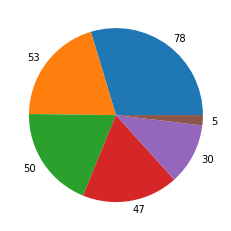

In [3]:
Rates = Books["My Rating"].value_counts()

plt.pie(Rates, labels = Rates)

plt.show()


In [4]:
list(Books.columns)

#Books['Date Read'].dropna(axis=0)


Books = Books[Books['Date Read'].notna()]
Books[['Date Read']]

Books['Year'] = pd.to_datetime(Books['Date Read'],format='%YYYY%mm%dd', errors='coerce')

Books['Year'] = pd.DatetimeIndex(Books['Date Read']).year
Books[['Year', 'Date Read']]

,Year,Date Read
1,2021,2021/01/01
3,2017,2017/10/11
6,2021,2021/12/20
7,2021,2021/12/12
8,2021,2021/10/13
...,...,...
245,2013,2013/08/01
246,2013,2013/08/28
253,2013,2013/06/01
261,2013,2013/05/01


In [5]:
RateMeans = Books["My Rating"].groupby(Books["Year"]).mean()
RateMeans



Year
2005    5.000000
2007    4.000000
2008    2.000000
2009    4.166667
2010    2.333333
2011    3.125000
2012    3.333333
2013    3.833333
2014    3.800000
2015    4.400000
2016    3.700000
2017    3.800000
2018    3.681818
2019    3.733333
2020    3.692308
2021    3.944444
Name: My Rating, dtype: float64

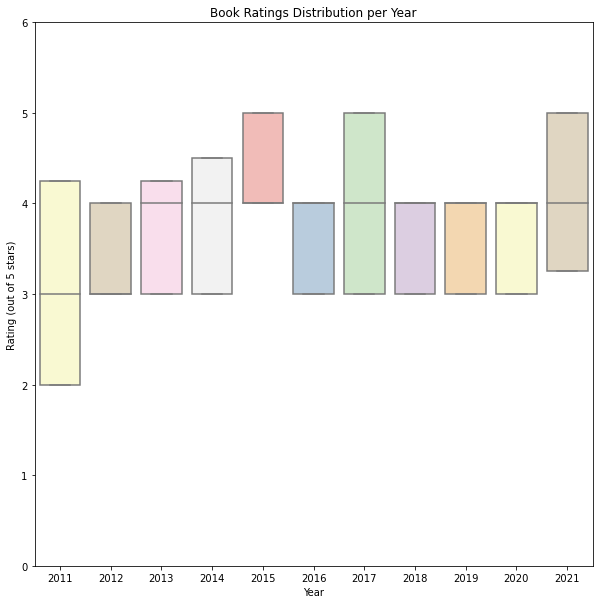

In [11]:
# Good source: https://www.youtube.com/watch?v=BE8CVGJuftI

fig,ax = plt.subplots(figsize=(10,10))


plot = sns.boxplot(
    data=Books, 
    x = "Year", 
    y = 'My Rating', 
    ax=ax,
    showfliers=False,
    whis=0, 
    palette = 'Pastel1'
    )
ax.set(xlim=(4.5, None),
       ylim=(0,6))

ax.set_title('Book Ratings Distribution per Year')
ax.set_ylabel('Rating (out of 5 stars)')

plt.show(plot)

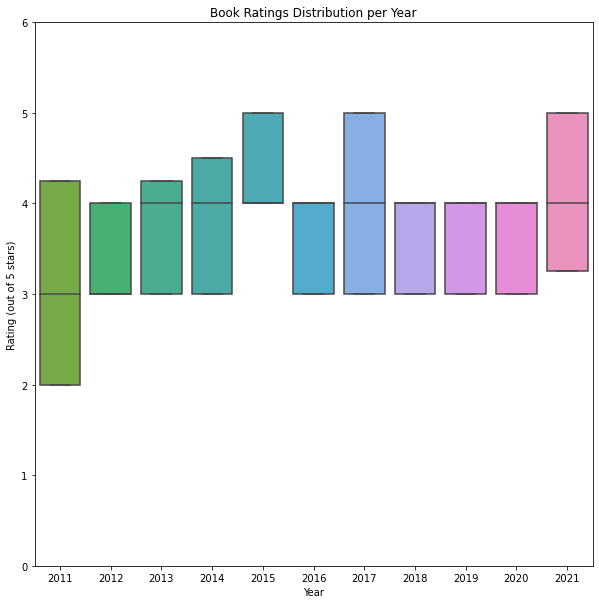

In [7]:
fig